In [1]:
# -------------------------------------------------------------
# Step 1: Import necessary libraries
# -------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
print("✅ Libraries imported.")


Matplotlib is building the font cache; this may take a moment.


✅ Libraries imported.


In [6]:
# -------------------------------------------------------------
# Step 2: Load the raw dataset
# -------------------------------------------------------------
print("📥 Loading dataset...")

df = pd.read_csv("../data/raw/house_data.csv")

print("✅ Dataset loaded successfully!")
print("Initial data shape:", df.shape)
print("\n🔍 Preview of data:")
print(df.head())


📥 Loading dataset...
✅ Dataset loaded successfully!
Initial data shape: (84, 7)

🔍 Preview of data:
     price  sqft  bedrooms  bathrooms    location  year_built  condition
0   495000  1527         2        1.5      Suburb        1956       Good
1   752000  2526         3        2.5    Downtown        1998  Excellent
2   319000  1622         2        1.5       Rural        1975       Fair
3  1210000  3102         4        3.0  Waterfront        2005  Excellent
4   462000  1835         2        2.0       Urban        1982       Good


In [3]:
ls -l

186.88s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


total 72
-rw-r--r--  1 mac  staff  6187 Sep  4 15:16 00_data_engineering.ipynb
-rw-r--r--  1 mac  staff  4883 Sep  4 15:16 01_exploratory_data_analysis.ipynb
-rw-r--r--  1 mac  staff  4686 Sep  4 15:16 02_feature_engineering.ipynb
-rw-r--r--  1 mac  staff  9302 Sep  4 15:16 03_experimentation.ipynb


In [7]:
# -------------------------------------------------------------
# Step 3: Understand structure — schema, datatypes, nulls
# -------------------------------------------------------------
print("\n📊 Data types and null value check:")
print(df.info())

print("\n❓ Any missing values?")
print(df.isnull().sum())



📊 Data types and null value check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       84 non-null     int64  
 1   sqft        84 non-null     int64  
 2   bedrooms    84 non-null     int64  
 3   bathrooms   84 non-null     float64
 4   location    84 non-null     object 
 5   year_built  84 non-null     int64  
 6   condition   84 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.7+ KB
None

❓ Any missing values?
price         0
sqft          0
bedrooms      0
bathrooms     0
location      0
year_built    0
condition     0
dtype: int64


In [8]:
# Step 3: Drop malformed rows (like the one with missing columns)
df = df.dropna()
df = df[df['price'] > 10000]  # basic sanity checks
df = df[df['sqft'] > 200]

In [9]:
# -------------------------------------------------------------
# Step 4: Standardize column names (basic cleanup)
# -------------------------------------------------------------
print("\n🧹 Cleaning column names (lowercase, underscores)...")

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("✅ Column names standardized:")
print(df.columns.tolist())



🧹 Cleaning column names (lowercase, underscores)...
✅ Column names standardized:
['price', 'sqft', 'bedrooms', 'bathrooms', 'location', 'year_built', 'condition']


In [10]:
# -------------------------------------------------------------
# Step 5: Basic stats check (spot outliers or issues)
# -------------------------------------------------------------
print("\n📈 Basic summary stats for numeric columns:")
print(df.describe())



📈 Basic summary stats for numeric columns:
              price         sqft   bedrooms  bathrooms   year_built
count  8.400000e+01    84.000000  84.000000  84.000000    84.000000
mean   6.285595e+05  2191.500000   2.857143   2.190476  1982.047619
std    3.591678e+05   650.017117   0.852252   0.828356    19.501563
min    2.490000e+05  1350.000000   2.000000   1.000000  1947.000000
25%    3.742500e+05  1695.000000   2.000000   1.500000  1965.000000
50%    5.110000e+05  1995.000000   3.000000   2.000000  1982.500000
75%    7.292500e+05  2590.000000   3.000000   2.500000  1995.500000
max    1.680000e+06  3850.000000   5.000000   4.500000  2019.000000



📊 Plotting distribution of house prices...


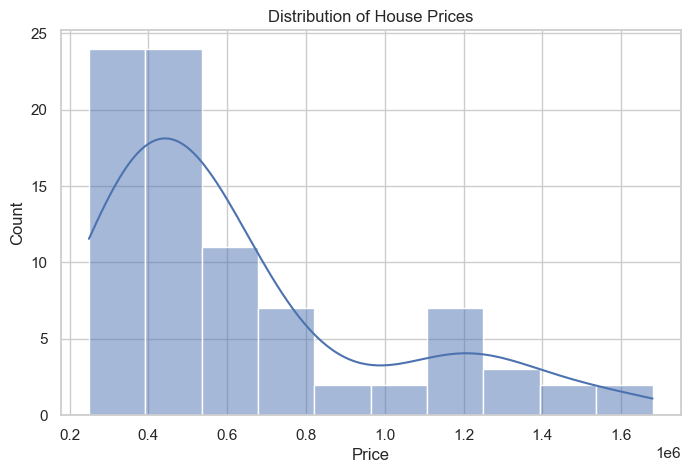

In [11]:
# -------------------------------------------------------------
# Step 6: Visual check for distributions (e.g. price, sqft)
# -------------------------------------------------------------
print("\n📊 Plotting distribution of house prices...")

plt.figure(figsize=(8, 5))
sns.histplot(df["price"], kde=True, bins=10)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


In [12]:
# -------------------------------------------------------------
# Step 7: Check for obvious data issues
# -------------------------------------------------------------
print("\n🔍 Looking for negative or unrealistic values...")

for col in ['price', 'sqft', 'bedrooms', 'bathrooms', 'year_built']:
    invalid = df[df[col] < 0]
    if not invalid.empty:
        print(f"⚠️ Found negative values in {col}:\n{invalid}")
    else:
        print(f"✅ No negative values found in {col}.")



🔍 Looking for negative or unrealistic values...
✅ No negative values found in price.
✅ No negative values found in sqft.
✅ No negative values found in bedrooms.
✅ No negative values found in bathrooms.
✅ No negative values found in year_built.


In [13]:
# -------------------------------------------------------------
# Step 8: Drop duplicates if any
# -------------------------------------------------------------
print("\n🧹 Checking for duplicate rows...")

duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"⚠️ Found {duplicates} duplicate rows. Dropping them...")
    df = df.drop_duplicates()
else:
    print("✅ No duplicate rows found.")



🧹 Checking for duplicate rows...
✅ No duplicate rows found.


In [14]:
# -------------------------------------------------------------
# Step 9: Save the cleaned version (optional here)
# -------------------------------------------------------------
print("\n💾 Saving cleaned version to interim file (optional step)...")

# Uncomment if you want to save at this point
# df.to_csv("../data/interim/cleaned_house_data_v1.csv", index=False)
print("✅ Data engineering preprocessing complete!")



💾 Saving cleaned version to interim file (optional step)...
✅ Data engineering preprocessing complete!
